<a href="https://colab.research.google.com/github/ayushsyntax/ML_Journey/blob/main/F_E(Pipelines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Without Pipeline

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')

In [16]:
# Select relevant features and target
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

In [17]:
# Fill missing numerical values with the mean
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Fare'].fillna(X['Fare'].mean(), inplace=True)

# Fill missing categorical values with the mode (most frequent value)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

<ipython-input-17-d02248147ebe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].mean(), inplace=True)
<ipython-input-17-d02248147ebe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)
<ipython-input-17-d02248147ebe>:3: FutureWarning: A value is trying to be set on a copy o

In [18]:
# Convert 'Sex' to numbers: male=0, female=1
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numbers: S=0, C=1, Q=2
X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

<ipython-input-18-48918986a664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
<ipython-input-18-48918986a664>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Make predictions
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without pipeline: {accuracy:.4f}")

Accuracy without pipeline: 0.8212


##2. With Pipeline

In [23]:
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')

In [24]:
# Select relevant features and target
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

In [25]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Numerical pipeline: Impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

# Categorical pipeline: Impute missing values and encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categories to numbers
])

In [31]:
from sklearn.compose import ColumnTransformer

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data
    ('classifier', RandomForestClassifier(random_state=42))  # Train the model
])

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [37]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with pipeline: {accuracy:.4f}")

Accuracy with pipeline: 0.8212


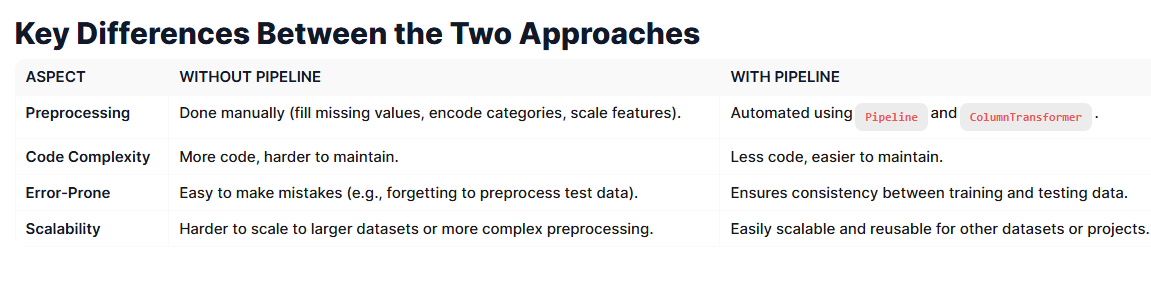